# TM10007 Assignment template -- ECG data

## Data loading and cleaning

Below are functions to load the dataset of your choice. After that, it is all up to you to create and evaluate a classification method. Beware, there may be missing values in these datasets. Good luck!

In [3]:
# Run this to use from colab environment
!git clone https://github.com/jveenland/tm10007_ml.git

import zipfile
import os
import pandas as pd

with zipfile.ZipFile('/content/tm10007_ml/ecg/ecg_data.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/tm10007_ml/ecg')

data = pd.read_csv('/content/tm10007_ml/ecg/ecg_data.csv', index_col=0)

print(f'The number of samples: {len(data.index)}')
print(f'The number of columns: {len(data.columns)}')

#test123

fatal: destination path 'tm10007_ml' already exists and is not an empty directory.
The number of samples: 827
The number of columns: 9001


In [4]:
print(data.head)

<bound method NDFrame.head of             0_0         0_1         0_2        0_3        0_4         0_5  \
0     47.685046   48.416904   37.371002  61.604757  58.732738  213.067966   
1    152.726718  297.353726  111.168880  25.419423  14.636085   24.609688   
2      1.601260    3.882169   22.978997  21.673040   8.919484   18.329286   
3      1.388947    3.052483    3.084103   4.627886  10.016196   15.020347   
4      3.625561    3.728466    6.205367  17.722897   5.699401    9.024836   
..          ...         ...         ...        ...        ...         ...   
822   14.673713   13.879148   10.000083   8.337630   3.557302    8.910661   
823    3.167367   13.771749    0.705951   0.349087   9.596407   14.721906   
824    0.439357    8.700374   20.628752  19.379063  23.176646   25.308323   
825    0.235515    4.074581    9.381945   9.621589  16.106126    8.376319   
826    0.301328    2.012000    9.122957   7.332689   7.862709   10.139178   

            0_6         0_7         0_8      

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets as ds
from sklearn import metrics

# Classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import RobustScaler


from sklearn.decomposition import PCA


import pandas as pd


import seaborn


# Classifiers
from sklearn import model_selection

from sklearn import feature_selection
from sklearn import preprocessing
from sklearn import neighbors
from sklearn import svm

def colorplot(clf, ax, x, y, h=100, precomputer=None):
    '''
    Overlay the decision areas as colors in an axes.

    Input:
        clf: trained classifier
        ax: axis to overlay color mesh on
        x: feature on x-axis
        y: feature on y-axis
        h(optional): steps in the mesh
    '''
    # Create a meshgrid the size of the axis
    xstep = (x.max() - x.min() ) / 20.0
    ystep = (y.max() - y.min() ) / 20.0
    x_min, x_max = x.min() - xstep, x.max() + xstep
    y_min, y_max = y.min() - ystep, y.max() + ystep
    h = max((x_max - x_min, y_max - y_min))/h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    features = np.c_[xx.ravel(), yy.ravel()]
    if precomputer is not None:
        if type(precomputer) is RBFSampler:
            features = precomputer.transform(features)
        elif precomputer is rbf_kernel:
            features = rbf_kernel(features, X)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(features)
    else:
        Z = clf.predict_proba(features)
    if len(Z.shape) > 1:
        Z = Z[:, 1]

    # Put the result into a color plot
    cm = plt.cm.RdBu_r
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
    del xx, yy, x_min, x_max, y_min, y_max, Z, cm


In [22]:
# Extracting features and labels
x = data.iloc[:, 0:-1].values  # Selecting all columns except the first and last
y = data.iloc[:, -1].values  # Selecting last column as labels

scaler = RobustScaler(quantile_range=(30,70))
scaled_data = scaler.fit_transform(x)

# Manually specify column names (assuming you know the original column names)
scaled_df = pd.DataFrame(scaled_data, columns=data.columns[0:-1])  # Use the same column names from data

print(scaled_df.head())


        0_0        0_1       0_2       0_3       0_4       0_5       0_6  \
0  0.571459   1.242171  1.065166  2.857623  2.258503  6.136840  1.704501   
1  2.197666  10.391857  4.690994  0.633239 -0.190274 -0.057489  0.226824   
2 -0.141988  -0.394706  0.358060  0.402941 -0.507728 -0.263916 -0.225099   
3 -0.145275  -0.425201 -0.619414 -0.644858 -0.446826 -0.372675  2.096566   
4 -0.110649  -0.400355 -0.466060  0.160118 -0.686546 -0.569738 -0.472104   

        0_7        0_8        0_9  ...    11_740    11_741    11_742  \
0  0.544447   0.220652  -0.547322  ...  0.237162 -0.509216  1.807435   
1  8.027504  29.885514  11.206980  ...  6.296111  5.530033  5.138813   
2 -0.042510   1.420020  -0.380914  ... -0.880781  0.134556 -0.345810   
3 -0.154676  -0.335514  -0.314658  ... -0.304050  0.818843 -0.387175   
4  0.307424   2.528213   0.405352  ... -0.508817 -0.691032 -0.678726   

     11_743    11_744    11_745    11_746    11_747    11_748    11_749  
0  0.372719  0.749069  0.762337  0.0

ValueError: X has 2 features, but LinearDiscriminantAnalysis is expecting 9000 features as input.

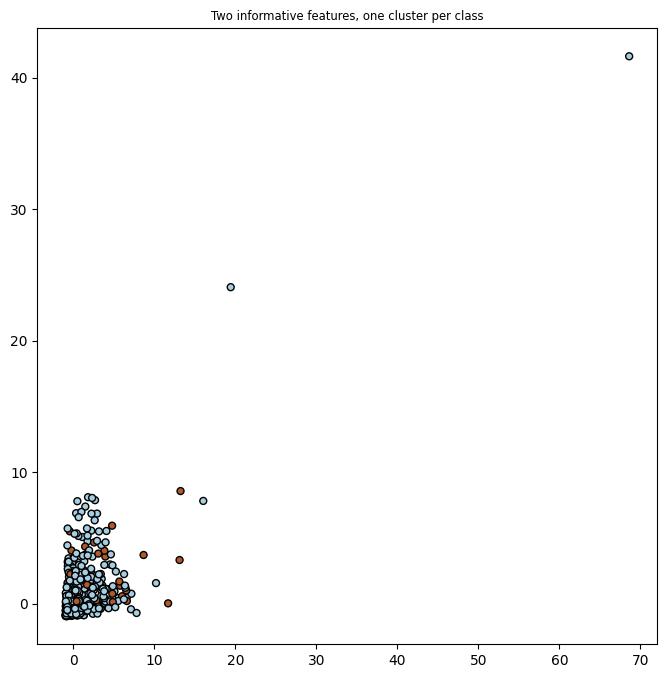

In [23]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.set_title("Two informative features, one cluster per class",
             fontsize='small')
ax.scatter(scaled_data[:, 30], scaled_data[:, 31], marker='o', c=y,
           s=25, edgecolor='k', cmap=plt.cm.Paired)
lda = LinearDiscriminantAnalysis()
lda = lda.fit(scaled_data, y)
y_pred = lda.predict(scaled_data)
colorplot(lda, ax, scaled_data[:, 0], scaled_data[:, 1])
print("Number of mislabeled points out of a total %d points : %d" % (scaled_data.shape[0], (y != y_pred).sum()))

In [ ]:
# Create the RFE object and compute a cross-validated score.
svc = svm.SVC(kernel="linear")

# classifications
rfecv = feature_selection.RFECV(
    estimator=svc, step=1,
    cv=model_selection.StratifiedKFold(4),
    scoring='roc_auc')
rfecv.fit(scaled_data, y)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.cv_results_["mean_test_score"]) + 1), rfecv.cv_results_["mean_test_score"])
plt.show()